In [22]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [23]:
im =  cv2.imread('inputted_data/dog.jpg')

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(2880, 1920, 3)


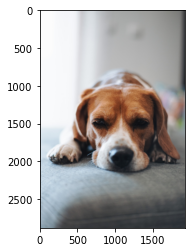

In [24]:
plt.imshow(im) # as RGB Format
plt.show()

In [28]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(5529600, 3)


In [29]:
from sklearn.cluster import KMeans

In [30]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

/home/rorremous/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [31]:
centers = km.cluster_centers_
print(centers) # In RGB Format

[[172.67097488 174.16295151 175.96294439]
 [ 64.6782508   55.67428576  53.67550466]
 [134.53786646 117.56330536 104.99962601]
 [233.08067461 236.43194962 240.35574898]]


In [32]:
# Convert to Integer format
centers = np.array(centers,dtype='uint8')

In [33]:
print(centers)

[[172 174 175]
 [ 64  55  53]
 [134 117 104]
 [233 236 240]]


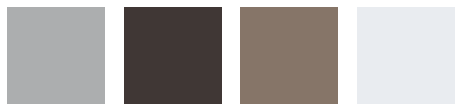

In [34]:
i = 1
plt.figure(0,figsize=(8,2))
# Storing info in color array
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

In [35]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


In [36]:
colors

[array([172, 174, 175], dtype=uint8),
 array([64, 55, 53], dtype=uint8),
 array([134, 117, 104], dtype=uint8),
 array([233, 236, 240], dtype=uint8)]

In [37]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [41]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

ValueError: cannot reshape array of size 495000 into shape (2880,1920,3)